In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 10.6 MB/s eta 0:00:00


In [2]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [4]:
!wget -O trash_inst_material.zip  https://www.dropbox.com/scl/fi/lt7gu0p0itsi0wmy224vi/trash_inst_material.zip?rlkey=qvvly8z0egxdok5va27q2qn1t&dl=0




--2023-11-16 04:40:04--  https://www.dropbox.com/scl/fi/lt7gu0p0itsi0wmy224vi/trash_inst_material.zip?rlkey=qvvly8z0egxdok5va27q2qn1t
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb7d12a40a835d4244d4eef2b47.dl.dropboxusercontent.com/cd/0/inline/CHmCAF9yjUKj6JY_VGHIaeY9f1UmPLVEYng_f0CkC5omr3Q9woEjY1wLlxAGv0rOhFIp5camGTv79tg7kyhcOcmAs9YFDHXfF1BpWPtMrVsZ-QvcL2yfaryG49CdIuq7Y_j0HdR2bClZzdc0Cb1Txov7/file# [following]
--2023-11-16 04:40:05--  https://ucb7d12a40a835d4244d4eef2b47.dl.dropboxusercontent.com/cd/0/inline/CHmCAF9yjUKj6JY_VGHIaeY9f1UmPLVEYng_f0CkC5omr3Q9woEjY1wLlxAGv0rOhFIp5camGTv79tg7kyhcOcmAs9YFDHXfF1BpWPtMrVsZ-QvcL2yfaryG49CdIuq7Y_j0HdR2bClZzdc0Cb1Txov7/file
Resolving ucb7d12a40a835d4244d4eef2b47.dl.dropboxusercontent.com (ucb7d12a40a835d4244d4eef2b47.dl.dropboxusercontent.com)... 162.125.3

In [5]:
!unzip /content/trash_inst_material.zip

Streaming output truncated to the last 5000 lines.
  inflating: trash_inst_material/train/images/vid_000246_frame0000036.jpg  
  inflating: trash_inst_material/train/images/vid_000249_frame0000008.jpg  
  inflating: trash_inst_material/train/images/vid_000249_frame0000009.jpg  
  inflating: trash_inst_material/train/images/vid_000249_frame0000020.jpg  
  inflating: trash_inst_material/train/images/vid_000250_frame0000055.jpg  
  inflating: trash_inst_material/train/images/vid_000250_frame0000076.jpg  
  inflating: trash_inst_material/train/images/vid_000251_frame0000013.jpg  
  inflating: trash_inst_material/train/images/vid_000251_frame0000017.jpg  
  inflating: trash_inst_material/train/images/vid_000251_frame0000023.jpg  
  inflating: trash_inst_material/train/images/vid_000251_frame0000028.jpg  
  inflating: trash_inst_material/train/images/vid_000251_frame0000036.jpg  
  inflating: trash_inst_material/train/images/vid_000252_frame0000015.jpg  
  inflating: trash_inst_material/trai

In [6]:
cwd = os.getcwd()
print(cwd)

/content


In [7]:
import yaml

attr = {
    'path': cwd+'/trash_inst_material',
    'train': 'train/images',
    'val': 'val/images',

    'names': {
        0: 'rov',
        1: 'plant',
        2: 'animal_fish',
        3: 'animal_starfish',
        4: 'animal_shells',
        5: 'animal_crab',
        6: 'animal_eel',
        7: 'animal_etc',
        8: 'trash_etc',
        9: 'trash_fabric',
        10: 'trash_fishing_gear',
        11: 'trash_metal',
        12: 'trash_paper',
        13: 'trash_plastic',
        14: 'trash_rubber',
        15: 'trash_wood',
    }
}

In [8]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)

In [9]:
EPOCHS = 17
!yolo \
task=segment \
mode=train \
model=yolov8m-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=8 \
name=yolov8m-seg \
exist_ok=True \
amp=False

100% 52.4M/52.4M [00:00<00:00, 265MB/s]
Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=trashcan_inst_material.yaml, epochs=17, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m-seg, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [10]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_inst_material/val/images/' \
name='yolov8m_predict' \
exist_ok=True \
save=True

Ultralytics YOLOv8.0.210 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27231648 parameters, 0 gradients, 110.0 GFLOPs

image 1/1204 /content/trash_inst_material/val/images/vid_000002_frame0000013.jpg: 384x640 1 trash_etc, 191.2ms
image 2/1204 /content/trash_inst_material/val/images/vid_000002_frame0000014.jpg: 384x640 1 trash_etc, 31.5ms
image 3/1204 /content/trash_inst_material/val/images/vid_000002_frame0000015.jpg: 384x640 1 trash_etc, 31.4ms
image 4/1204 /content/trash_inst_material/val/images/vid_000002_frame0000016.jpg: 384x640 1 trash_etc, 31.4ms
image 5/1204 /content/trash_inst_material/val/images/vid_000002_frame0000017.jpg: 384x640 1 trash_etc, 1 trash_plastic, 31.4ms
image 6/1204 /content/trash_inst_material/val/images/vid_000002_frame0000018.jpg: 384x640 1 trash_etc, 31.4ms
image 7/1204 /content/trash_inst_material/val/images/vid_000002_frame0000019.jpg: 384x640 1 trash_etc, 27.3ms
image 8/1204 /content/trash_inst_ma

In [11]:
def visualize(result_dir):

    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

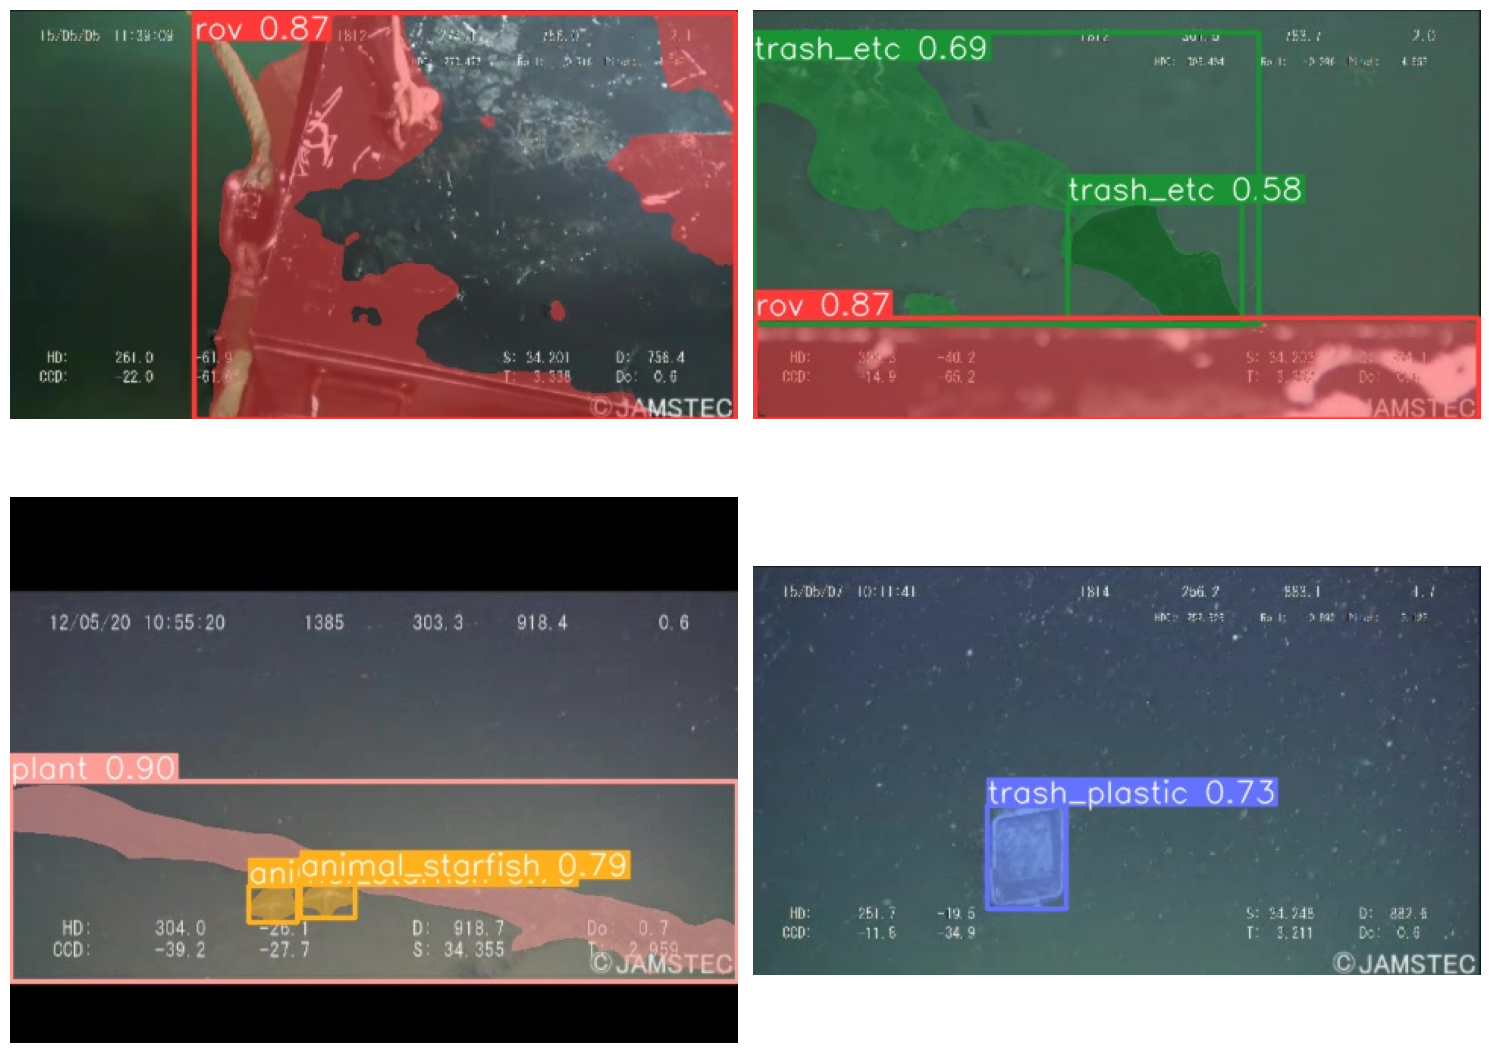

In [12]:
visualize('runs/segment/yolov8m_predict')